In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import math
from numpy import radians, cos, sin, arcsin, sqrt
import plotly as pt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Ganapathy\Desktop\Portfolio\Cyclistic\Unzipped\12months\combined-csv-files.csv",low_memory = False)


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.6346,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379166666666,-87.62368116666667,41.8642215,-87.62343883333334,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464066666667,-87.619549,41.884971166666666,-87.62757366666666,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884092833333334,-87.62963933333333,41.8895825,-87.62753966666666,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.6837665,41.903001833333335,-87.68384433333334,casual


In [4]:
#Drop and rename selected columns
df.rename(columns={'rideable_type':'bike_type','member_casual':'user_type'},inplace=True)
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.6346,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379166666666,-87.62368116666667,41.8642215,-87.62343883333334,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464066666667,-87.619549,41.884971166666666,-87.62757366666666,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884092833333334,-87.62963933333333,41.8895825,-87.62753966666666,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.6837665,41.903001833333335,-87.68384433333334,casual


In [5]:
df.dtypes

ride_id               object
bike_type             object
started_at            object
ended_at              object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             object
start_lng             object
end_lat               object
end_lng               object
user_type             object
dtype: object

In [6]:
#Conversion of data types
df['started_at'] = pd.to_datetime(df['started_at'],dayfirst=True,errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'],dayfirst = True,errors='coerce')
df.dtypes

ride_id                       object
bike_type                     object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                     object
start_lng                     object
end_lat                       object
end_lng                       object
user_type                     object
dtype: object

In [7]:
#Create new columns
df['ride_time'] = df.ended_at - df.started_at
df['month'] = df.started_at.dt.month
df['start_hour'] = df.started_at.dt.hour
df['day_of_week'] = df.started_at.dt.day_name()

In [8]:
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_time,month,start_hour,day_of_week
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.6346,member,0 days 00:09:37,8.0,18.0,Thursday
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379166666666,-87.62368116666667,41.8642215,-87.62343883333334,casual,0 days 01:08:47,8.0,18.0,Thursday
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464066666667,-87.619549,41.884971166666666,-87.62757366666666,casual,0 days 02:08:53,8.0,19.0,Wednesday
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884092833333334,-87.62963933333333,41.8895825,-87.62753966666666,casual,0 days 00:48:04,8.0,12.0,Thursday
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.6837665,41.903001833333335,-87.68384433333334,casual,0 days 00:10:47,8.0,16.0,Thursday


In [9]:
df["start_lng"] = pd.to_numeric(df.start_lng, errors='coerce')
df["start_lat"] = pd.to_numeric(df.start_lat, errors='coerce')
df["end_lat"] = pd.to_numeric(df.end_lat, errors='coerce')
df["end_lng"] = pd.to_numeric(df.end_lng, errors='coerce')
                              
df.dtypes

ride_id                        object
bike_type                      object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
user_type                      object
ride_time             timedelta64[ns]
month                         float64
start_hour                    float64
day_of_week                    object
dtype: object

In [10]:
#Haversine formula. This formula calculates distance between two points on a oblong sphere (the category that our planet falls under).



def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1.values)
    lat1 = np.radians(lat1.values)
    lon2 = np.radians(lon2.values)
    lat2 = np.radians(lat2.values)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    dlat = np.subtract(lat2, lat1)

    a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),  
                          np.multiply(np.cos(lat1), 
                                      np.multiply(np.cos(lat2), 
                                                  np.power(np.sin(np.divide(dlon, 2)), 2))))
    c = np.multiply(2, np.arcsin(np.sqrt(a)))
    r = 6371

    return c*r
x = haversine(df.start_lng,df.start_lat,df.end_lng,df.end_lat)
x

array([1.88515254, 0.02664715, 0.66532459, ..., 0.        , 0.        ,
              nan])

In [11]:
#Create additional columns.

df['distance_estimate'] = np.round(x*0.6213712,2)
df['mph_estimate'] = df.distance_estimate / (df.ride_time.dt.seconds / 3600)
df['returned_location'] = df.distance_estimate.apply(lambda x: 'same location' if x == 0  else 'new location')
df['date'] = df.started_at.dt.date

In [12]:
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,user_type,ride_time,month,start_hour,day_of_week,distance_estimate,mph_estimate,returned_location,date
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,...,-87.634600,member,0 days 00:09:37,8.0,18.0,Thursday,1.17,7.299827,new location,2020-08-20
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,-87.623681,...,-87.623439,casual,0 days 01:08:47,8.0,18.0,Thursday,0.02,0.017446,new location,2020-08-27
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,-87.619549,...,-87.627574,casual,0 days 02:08:53,8.0,19.0,Wednesday,0.41,0.190870,new location,2020-08-26
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,-87.629639,...,-87.627540,casual,0 days 00:48:04,8.0,12.0,Thursday,0.39,0.486824,new location,2020-08-27
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.683767,...,-87.683844,casual,0 days 00:10:47,8.0,16.0,Thursday,0.00,0.000000,same location,2020-08-27


In [13]:
# Remove unreliable data
# Check for null values
df.isnull().sum()


ride_id                    0
bike_type                  1
started_at                12
ended_at                  12
start_station_name    369183
start_station_id      369805
end_station_name      407301
end_station_id        407760
start_lat                 12
start_lng                 12
end_lat                 5259
end_lng                 5259
user_type                  1
ride_time                 12
month                     12
start_hour                12
day_of_week               12
distance_estimate       5259
mph_estimate            5370
returned_location          0
date                      12
dtype: int64

In [14]:
#Check timeframe of dataset.

print(df.started_at.min())
print(df.started_at.max())

2020-08-01 00:00:01
2021-07-31 23:59:58


In [15]:
#Reorder columns.

df = df[['date','ride_id', 'bike_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'ride_time', 'month',
       'start_hour', 'day_of_week', 'distance_estimate', 'mph_estimate',
       'returned_location']]

#Convert data type.

df.date = pd.to_datetime(df.date)

#Check total amount of datapoints before data cleaning.

df.shape

(4731093, 21)

In [16]:
#Duplicate data check.

print('Duplicates?\n')
print(df.drop_duplicates(keep=False).shape)
#Remove data without ending location coordinates.

print('Ending Coordinates?\n')
df.dropna(subset=['end_lat','end_lng'],how='any',inplace=True)
print(df.shape)

Duplicates?

(4731082, 21)
Ending Coordinates?

(4725834, 21)


In [17]:
#Check the min, max, and average of the dataset.

print('Ride min,max, and mean?\n')
print(df.ride_time.agg(['min','max','mean']))

Ride min,max, and mean?

min           -21 days +19:50:02
max             38 days 20:24:09
mean   0 days 00:21:32.720205153
Name: ride_time, dtype: timedelta64[ns]


In [18]:
#Check data points that contain negative time duration and datapoints longer than 1 day
print('Less than 0 days or more than 1 day?\n')
ts1 = dt.timedelta(days = 0)
ts2 = dt.timedelta(days=1)
print(df[df.ride_time <= ts1].shape)
print(df[df.ride_time >= ts2].shape)


Less than 0 days or more than 1 day?

(8574, 21)
(1793, 21)


In [19]:
#Remove data with negative time length durations and data with more than one day of the bicycle rented.

df = df[df.ride_time >= ts1]
df = df[df.ride_time <= ts2]
print(df.shape)
#Convert ride time into minutes rounded to nearest whole minute.

df.ride_time = df.ride_time.dt.total_seconds()/60
df.ride_time = df.ride_time.round()
#Remove rides that are less than 1 minute in duration.
df = df[df.ride_time >= 1]
print(df.shape)

#Remove rides where estimated mph is over 85 miles per hour.
df = df[df.mph_estimate <= 85]
print(df.shape)

(4715924, 21)
(4665914, 21)
(4665898, 21)


In [20]:
#View timeframe of dataset.

df.started_at.agg(['min','max'])

min   2020-08-01 00:00:01
max   2021-07-31 23:59:58
Name: started_at, dtype: datetime64[ns]

In [21]:
df.shape

(4665898, 21)

In [22]:
# Exploratory Analysis
#Percentage of rides taken by user type.
df.user_type.value_counts(normalize=True).round(2)*100

member    56.0
casual    44.0
Name: user_type, dtype: float64

In [23]:
#Average user ride time in minutes.
df.groupby(['user_type']).ride_time.mean().round()

user_type
casual    31.0
member    14.0
Name: ride_time, dtype: float64

In [24]:
#Bike preferences as a percentage of their respective user type.
df3=df.groupby(['user_type']).bike_type.value_counts(normalize=True).round(2)*100
df3


user_type  bike_type    
casual     docked_bike      36.0
           classic_bike     33.0
           electric_bike    31.0
member     classic_bike     42.0
           docked_bike      30.0
           electric_bike    28.0
Name: bike_type, dtype: float64

In [25]:
#Average user ride time in minutes by bike type.
df.groupby(['user_type','bike_type']).ride_time.mean().round(2).sort_values()

user_type  bike_type    
member     electric_bike    13.77
           classic_bike     14.40
           docked_bike      15.22
casual     electric_bike    21.96
           classic_bike     27.75
           docked_bike      40.54
Name: ride_time, dtype: float64

It looks like members and casual users have the quickest bike ride with electric_bikes.However when we look at the gap between the fastest and slowest ride it looks like members have a very slight difference because of their frequent tendency to go biking when compared to casual riders.Members are more fit, whereas casual riders make use of electric bikes to commute fast.

In [26]:
#Average distance traveled.
df.groupby(['user_type']).distance_estimate.mean().sort_values()

user_type
member    1.395945
casual    1.404354
Name: distance_estimate, dtype: float64

Looks like both the user types travel the same distance. 

In [27]:
#Average user mph.
df3=df.groupby(['user_type']).mph_estimate.mean().round(2)
df3

user_type
casual    4.68
member    6.56
Name: mph_estimate, dtype: float64

This is a noticeable difference between the 2 groups which can be clearly visualized by a bar graph


In [28]:
#User speed by bike type.
df.groupby(['user_type','bike_type']).mph_estimate.mean().round(2).sort_values()

user_type  bike_type    
casual     docked_bike      3.69
           classic_bike     4.49
           electric_bike    6.05
member     docked_bike      6.12
           classic_bike     6.15
           electric_bike    7.64
Name: mph_estimate, dtype: float64

casual users are slower than members and electric bikes are the fastest in both the groups.

In [29]:
#Day of week preference as a percentage of their respective user type.
df.groupby(['user_type']).day_of_week.value_counts(normalize=True).round(2).unstack()*100

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_type,,,,,,,
casual,14.0,11.0,23.0,19.0,11.0,11.0,11.0
member,15.0,13.0,15.0,13.0,14.0,14.0,15.0


Big difference between the groups here. More than 40% of rides for Casual riders take place on weekends whereas members do not show significant difference on any day of the week.

In [30]:
#Average user ride time in minutes by day of week.
df.groupby(['day_of_week','user_type']).ride_time.mean().sort_values(ascending = True).round().unstack().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

user_type,casual,member
day_of_week,,
Monday,31.0,14.0
Tuesday,28.0,14.0
Wednesday,27.0,14.0
Thursday,26.0,14.0
Friday,28.0,14.0
Saturday,33.0,16.0
Sunday,35.0,16.0


Weekends have the longest ride time, although not much of user type.

In [31]:
#The percentage of when a user will return the docked bicycle to a new location or the same location.
df[df.bike_type=='docked_bike'].groupby(['user_type']).returned_location.value_counts(normalize=True).round(2).unstack()*100

returned_location,new location,same location
user_type,,
casual,82.0,18.0
member,95.0,5.0


Casual riders are almost four times more likely to return a bike compared to the members.
I would think this return to start location habit is more likely with the casual users because of the two types of Cyclistic casual passes:

1. Single-Ride Pass
2. Full-Day pass

I would like to see one more thing about the return location figures.

In [32]:
df.groupby(['user_type','returned_location']).ride_time.mean().round(2)

user_type  returned_location
casual     new location         27.67
           same location        52.85
member     new location         14.26
           same location        19.41
Name: ride_time, dtype: float64

The average ride time for casual users who return to their starting location take about twice as long as casual users going to a new location. Knowing that the average ride time for a casual user is 25 minutes, it seems that casual users returning to the same location are making a round trip ride.

Members, however, do not show this trend of taking twice as long in their speculated 'round trip' visit. Members must have different habits when they return a bike to the same location.

In [33]:
#Percentage of rides by month by respective user type.
df.groupby(['user_type']).month.value_counts(normalize=True).round(2).sort_index()*100

user_type  month
casual     1.0       1.0
           2.0       0.0
           3.0       4.0
           4.0       7.0
           5.0      12.0
           6.0      18.0
           7.0      21.0
           8.0      14.0
           9.0      11.0
           10.0      7.0
           11.0      4.0
           12.0      1.0
member     1.0       3.0
           2.0       1.0
           3.0       6.0
           4.0       8.0
           5.0      10.0
           6.0      14.0
           7.0      15.0
           8.0      13.0
           9.0      11.0
           10.0      9.0
           11.0      7.0
           12.0      4.0
Name: month, dtype: float64

All users prefer riding from May through September. This should be because of the weather in Chicago.

In [34]:
#Percentage of rides taken by starting hour.
df.groupby(['user_type']).start_hour.value_counts(normalize=True).round(2).sort_index()*100

user_type  start_hour
casual     0.0            2.0
           1.0            1.0
           2.0            1.0
           3.0            0.0
           4.0            0.0
           5.0            0.0
           6.0            1.0
           7.0            2.0
           8.0            2.0
           9.0            3.0
           10.0           4.0
           11.0           5.0
           12.0           7.0
           13.0           7.0
           14.0           7.0
           15.0           8.0
           16.0           8.0
           17.0          10.0
           18.0           9.0
           19.0           7.0
           20.0           5.0
           21.0           4.0
           22.0           4.0
           23.0           3.0
member     0.0            1.0
           1.0            1.0
           2.0            0.0
           3.0            0.0
           4.0            0.0
           5.0            1.0
           6.0            3.0
           7.0            5.0
           8.0    

Both user types have lots of start times from 3pm to 7 pm. This can be visualized using a heatmap.

In [35]:
#Bike preference by month
df.groupby(['month','user_type','bike_type']).ride_id.count().unstack().fillna(0)

bike_type        classic_bike  docked_bike  electric_bike
month user_type                                          
1.0   casual           8206.0       2078.0         7618.0
      member          52957.0          1.0        24947.0
2.0   casual           5592.0       1246.0         3118.0
      member          28802.0          0.0        10020.0
3.0   casual          45216.0      15516.0        22543.0
      member         106041.0          0.0        37013.0
4.0   casual          70222.0      24520.0        40528.0
      member         142349.0          0.0        56021.0
5.0   casual         122817.0      42958.0        88272.0
      member         183067.0          0.0        88264.0
6.0   casual         186397.0      51250.0       128576.0
      member         244068.0          0.0       110571.0
7.0   casual         239376.0      57285.0       140767.0
      member         262505.0          0.0       113471.0
8.0   casual              0.0     258020.0        26648.0
      member              0.0     289329.0        37116.0
9.0   casual              0.0     169586.0        57666.0
      member              0.0     228024.0        68503.0
10.0  casual              0.0      78584.0        63664.0
      member              0.0     152870.0        85898.0
11.0  casual              0.0      45405.0        41516.0
      member              0.0     103601.0        65374.0
12.0  casual          11233.0       4894.0        13591.0
      member          58791.0       7686.0        33701.0

Conclusion: Similarities and Differences.

During this analysis, I was able to find out interesting differences between the casual user and the annual member. We learned that the average ride duration, the average speed traveled, the day of week riding preferences, and the return location exhibit different patterns between our two groups. What was also surprising to discover was the amount of similarities between both groups. The bike type preferences made any given month, the average distance traveled, and the prefered riding months were strikingly similiar.

Visualizations:

Lily Moreno, Marketing Director, believes that Cyclistic's success will rely on maximizing the number of annual membership subscriptions. With that objective in mind, I have discovered relationships that will aid the marketing department for their first targeted marketing campaign. Let's begin by discussing the differences between the casual user and the annual member.


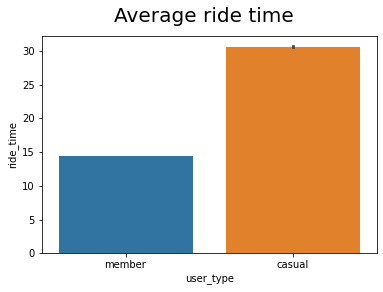

In [36]:
#How do casual users and annual members differ?
#Average ride time graph.
sns.barplot(x='user_type',y='ride_time',data=df)
plt.suptitle('Average ride time',fontsize=20)
plt.show()

Casual riders ride an average of 30 minutes while a member ride an average of 15 minutes. This could be because casual riders ride more distance than the members. To understand that lets take a look at the distance covered by both the users.

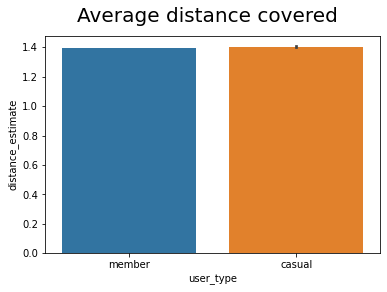

In [37]:
#Average distance covered
sns.barplot(x='user_type',y='distance_estimate',data=df)
plt.suptitle('Average distance covered',fontsize=20)
plt.show()

Both riders cover almost same distance on average.

Although casual users average ride duration is more than twice as long than the annual members ride duration, casual users do not appear to ride further than members.

Let's clarify this riding pattern and review the average ride speed.

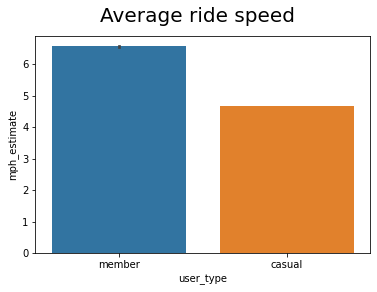

In [38]:
#Average ride speed
sns.barplot(x='user_type',y='mph_estimate',data=df)
plt.suptitle('Average ride speed',fontsize=20)
plt.show()

A casual user will travel at 4.68 MPH while a member will travel at 6.56 MPH. This means the average member travels ~48% faster than the average casual user.

This is beginning to paint a picture of the average casual user and their respective riding habits on an individual level. Let's examine more broad patterns.

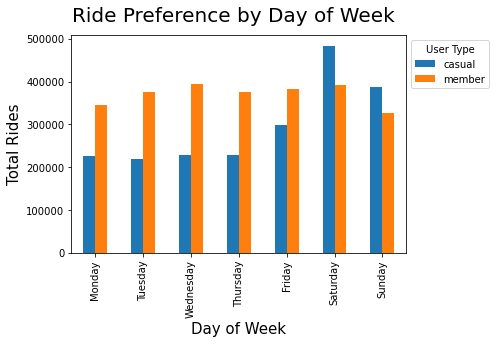

In [39]:
#Ridership by day of week graph.

df.groupby(['day_of_week','user_type']).ride_id.count().unstack().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')

plt.suptitle('Ride Preference by Day of Week',fontsize=20)
plt.xlabel('Day of Week',fontsize=15)
plt.ylabel('Total Rides',fontsize=15)

# plt.grid(True,color='gray',linestyle=(0, (2, 10)))
plt.legend(title='User Type',bbox_to_anchor=(1,1), loc="upper left")
plt.show()

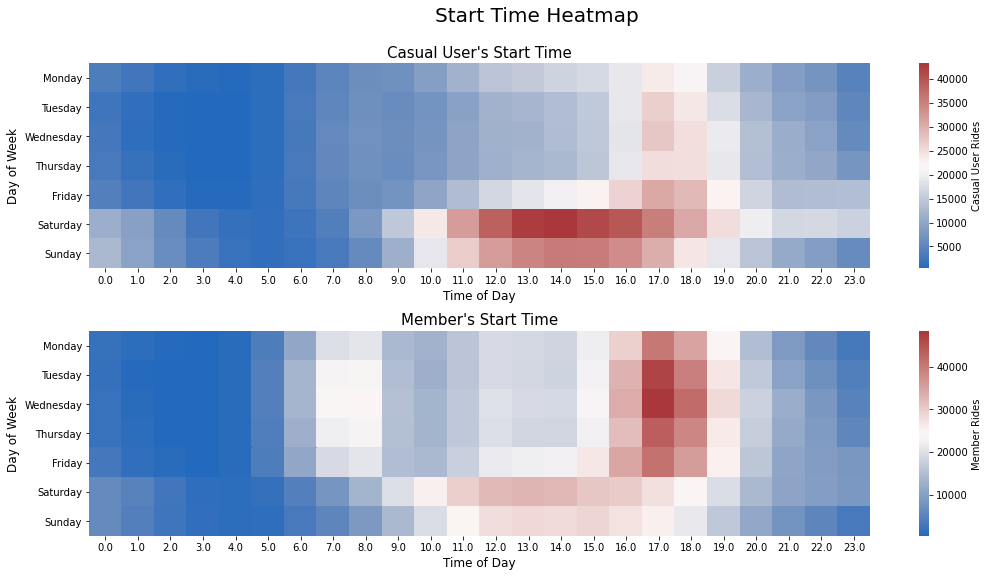

In [40]:
#Start Time Heatmap

dfc = df[df.user_type == 'casual']
dfm = df[df.user_type == 'member']

dfc_hm = dfc.groupby(['start_hour','day_of_week']).ride_id.count().unstack().T.reindex().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dfm_hm = dfm.groupby(['start_hour','day_of_week']).ride_id.count().unstack().T.reindex().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 8))
sns.heatmap(data = dfc_hm,cmap='vlag',ax=ax1,cbar_kws={'label':'Casual User Rides'})
sns.heatmap(data = dfm_hm,cmap='vlag',ax=ax2,cbar_kws={'label':'Member Rides'})

ax1.set_title("Casual User's Start Time",fontsize=15)
ax2.set_title("Member's Start Time",fontsize=15)

ax1.set_xlabel('Time of Day',fontsize=12)
ax1.set_ylabel('Day of Week',fontsize=12)

ax2.set_xlabel('Time of Day',fontsize=12)
ax2.set_ylabel('Day of Week',fontsize=12)

plt.suptitle('Start Time Heatmap',fontsize=20,va='center')
plt.tight_layout()
plt.show()


Casual users show a concentration of riding on weekends during the hours of 11 am to 6 pm.

Members show a concentration of riding on weekedays between 4 pm and 6 pm. Additionally, members show non-trivial usage during 7 am and 8 am. Member times appear to refllect common commuting schedules.

Summary of Differences Between Casual Users and Members.
We now have an understanding of the fundamental differences between the casual user and the annual member.

The average casual user ride duration lasts more than twice as long as the average member.
The average member ride speed is about 48% faster than the average casual user.
Casual users prefer riding on weekends, between the hours of 11 am to 6 pm, while members prefer to use the service primarily on weekdays, between the hours of 4 pm to 6 pm.
Our findings indicate that casual users are primarily using Cyclistic services for recreational purposes. When designing the marketing campaign, emphasize the recreational qualities of an annual membership.

